# Taller de visualización y explicabilidad

En este taller vamos a ver de manera simplificada y a alto nivel algunas de las técnicas de visualización más utilizadas en la actualidad para la visualización de datos y su comprensión. 
La información presentada se descompone en:
* Técnicas de visualización clásicas
* Técnicas de visualización avanzadas
* Técnicas de visualización con datos textuales
* Técnicas de contrafactuales

Inicialización del dataset a utilizar.

In [69]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import tensorflow as tf
import umap
import umap.plot
import seaborn as sns
import numpy as np
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

warnings.filterwarnings("ignore")

iris = datasets.load_iris()
X = iris.data
Y = iris.target

## Técnicas de visualización clásicas

### 1. Principal Component Analysis (PCA)

Es un método estadístico que crea nuevas funciones o características de los datos mediante el análisis de las características del conjunto de datos. Esencialmente, las características de los datos se resumen o combinan. 

También se puede concebir el análisis de componentes principales como "aplastar" los datos en unas pocas dimensiones desde un espacio de dimensiones mucho más altas.

El análisis de componentes principales selecciona las características "principales" o más influyentes del conjunto de datos y crea funciones basadas en ellas. Al elegir solo las características con mayor influencia en el conjunto de datos, se reduce la dimensionalidad.

PCA preserva las correlaciones entre variables cuando crea nuevas funciones. Las componentes principales creadas por la técnica son combinaciones lineales de las variables originales, calculadas con conceptos llamados autovectores. Intentan maximizar la **varianza**.

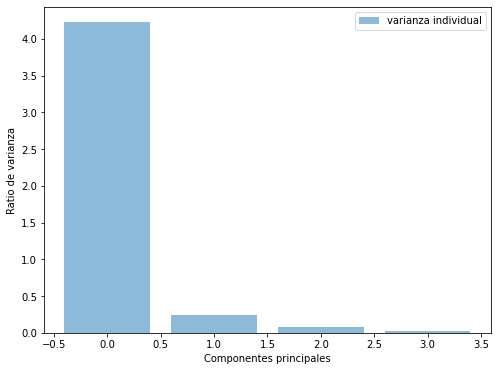

In [72]:
# Visualizamos los resultados del PCA
pca = PCA()
pca.fit_transform(X)
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(4), pca_variance, alpha=0.5, align='center', label='varianza individual')
plt.legend()
plt.ylabel('Ratio de varianza')
plt.xlabel('Componentes principales')
plt.show()

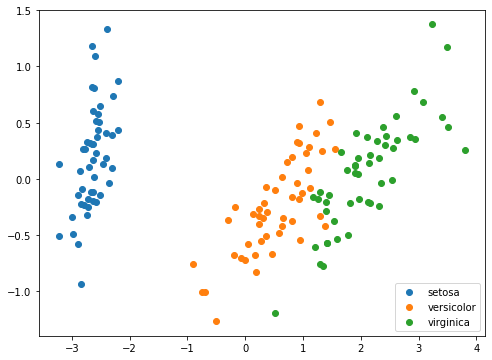

In [75]:
# Visualización basada en las 2 características principales.
pca2 = PCA(n_components=2)
pca2.fit(X)
x_sol2 = pca2.transform(X)

labels = range(len(iris.target_names))
plt.figure(figsize=(8,6))
colors = sns.color_palette(None, len(labels))
for i, c, label in zip(labels, colors, iris.target_names):
    plt.scatter(x_sol2[Y == i, 0], x_sol2[Y == i, 1], c=np.array([c]), label=label)
plt.legend()
plt.show()

### 2. Descomposición en valores singulares (SVD)

Es uno de los métodos ampliamente utilizados para la reducción de la dimensionalidad. Muy util con **datos dispersos**. Para llevar a cabo esta tareas descompone una matriz en otras tres matrices.

Si vemos las matrices como algo que provoca una transformación lineal en el espacio, entonces descomponemos una única transformación en tres movimientos.

* SVD factoriza una sola matriz en la matriz U, D y V* respectivamente.
* U y V* son matrices ortogonales.
* D es una matriz diagonal de valores singulares

SVD también puede verse como la descomposición de una transformación compleja en 3 transformaciones más simples (rotación, escala y rotación).

* Las matrices U y V* provocan la rotación
* La matriz diagonal D provoca escalado

Básicamente, nos permite expresar nuestra matriz original como una combinación lineal de matrices de bajo rango. Solo los primeros valores singulares son grandes, por lo que los términos que no sean los primeros pueden ignorarse sin perder mucha información. Por eso SVD se conoce como una técnica de reducción de dimensionalidad.

In [76]:
# Visualización basada en las 2 características principales.
trun_svd = TruncatedSVD(n_components=2)
A_transformed = trun_svd.fit_transform(X)
A_transformed[0:5]

array([[5.91274714, 2.30203322],
       [5.57248242, 1.97182599],
       [5.44697714, 2.09520636],
       [5.43645948, 1.87038151],
       [5.87564494, 2.32829018]])

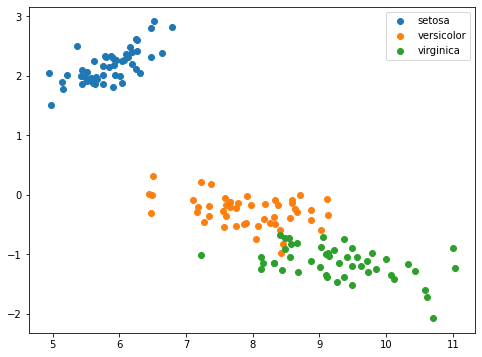

In [77]:
labels = range(len(iris.target_names))
plt.figure(figsize=(8,6))
colors = sns.color_palette(None, len(labels))
for i, c, label in zip(labels, colors, iris.target_names):
    plt.scatter(A_transformed[Y == i, 0], A_transformed[Y == i, 1], c=np.array([c]), label=label)
plt.legend()
plt.show()

### 3. Multi-Dimensional Scaling (MDS)

Es un medio para visualizar el nivel de similitud de los casos individuales de un conjunto de datos. Se usa para traducir "información sobre las 'distancias' por pares entre un conjunto de N objetos o individuos" en una configuración de N puntos mapeados en un espacio Cartesiano.

Más técnicamente, MDS se refiere a un conjunto de técnicas de ordenación relacionadas utilizadas en la visualización de información, en particular para mostrar la información contenida en una matriz de distancia. Es una forma de reducción de dimensionalidad no lineal.

Dada una matriz de distancias con las distancias entre cada par de objetos en un conjunto, y un número elegido de dimensiones, N, un algoritmo MDS coloca cada objeto en un espacio N-dimensional (una representación de menor dimensión) tal que las distancias entre objetos se conservan lo mejor posible. Para N = 1, 2 y 3, los puntos resultantes se pueden visualizar en un gráfico de dispersión.

In [78]:
# Visualización basada en 2 componentes.
mds = MDS(n_components=2, random_state=0)
X_transform = mds.fit_transform(X)
X_transform[0:5]

array([[ 0.84386026, -2.57931921],
       [ 1.32365512, -2.38871376],
       [ 1.32958775, -2.58647441],
       [ 1.44065769, -2.36974567],
       [ 0.83976071, -2.63569863]])

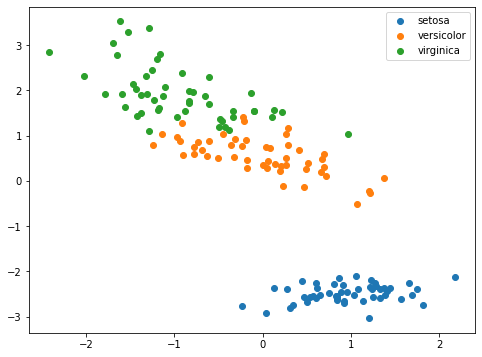

In [79]:
labels = range(len(iris.target_names))
plt.figure(figsize=(8,6))
colors = sns.color_palette(None, len(labels))
for i, c, label in zip(labels, colors, iris.target_names):
    plt.scatter(X_transform[Y == i, 0], X_transform[Y == i, 1], c=np.array([c]), label=label)
plt.legend()
plt.show()

## Técnicas de visualización avanzadas

### 4.T-Distributed Stochastic Neighbouring Entities (T-SNE)

Es otra técnica para la reducción de la dimensionalidad y es particularmente adecuada para la visualización de conjuntos de datos de alta dimensión.Es una técnica probabilística.

Funciona minimizando la divergencia entre dos distribuciones: una distribución que mide las similitudes por pares de los objetos de entrada y una distribución que mide las similitudes por pares de los puntos correspondientes de baja dimensión en la salida.

Esencialmente, lo que esto significa es que en base a los datos originales que se ingresan en el algoritmo, analiza cómo representar mejor estos datos utilizando menos dimensiones al hacer coincidir ambas distribuciones. La forma en que lo hace es computacionalmente bastante pesada y, por lo tanto, existen algunas limitaciones para el uso de esta técnica. De hecho, al ser iterativo, se suele parar el algoritmo antes de su convergencia, obteniendo aproximaciones aceptables del resultado.

Importante remarcar el parámetro *perplexity*, que dice (vagamente) cómo equilibrar la atención entre los aspectos locales y globales de sus datos. El parámetro es una suposición sobre el número de vecinos cercanos que tiene cada punto.

Artículo: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbcl

In [81]:
tsne = TSNE(n_components=2, random_state=0,perplexity=50, learning_rate="auto", init="pca")
X_tsne = tsne.fit_transform(X)

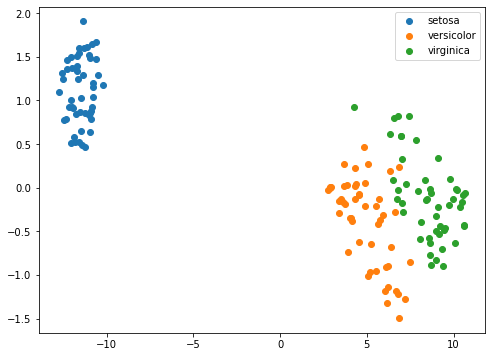

In [82]:
labels = range(len(iris.target_names))
plt.figure(figsize=(8,6))
colors = sns.color_palette(None, len(labels))
for i, c, label in zip(labels, colors, iris.target_names):
    plt.scatter(X_tsne[Y == i, 0], X_tsne[Y == i, 1], c=np.array([c]), label=label)
plt.legend()
plt.show()

### 5. Uniform Manifold Approximation and Projection (UMAP)

UMAP es una técnica de reducción de dimensión que se puede utilizar para la visualización de forma similar a t-SNE, pero también para la reducción de dimensión no lineal general. El algoritmo se basa en tres supuestos sobre los datos.

* Los datos se distribuyen uniformemente en la variedad de Riemann (generalización del concepto métrico, diferencial y topológico del espacio euclidiano).
* La métrica de Riemann es localmente constante (o puede aproximarse como tal).
* El conjunto está conectado localmente.

A partir de estos supuestos es posible modelar la variedad con una estructura topológica difusa. La incrustación se encuentra buscando una proyección de baja dimensión de los datos que tenga la estructura topológica difusa equivalente más cercana posible.

Artículo: https://arxiv.org/abs/1802.03426

In [83]:
umap_projection = umap.UMAP(n_components=2,min_dist=0.5,n_neighbors=10,random_state=0)
X_umap = umap_projection.fit_transform(X)

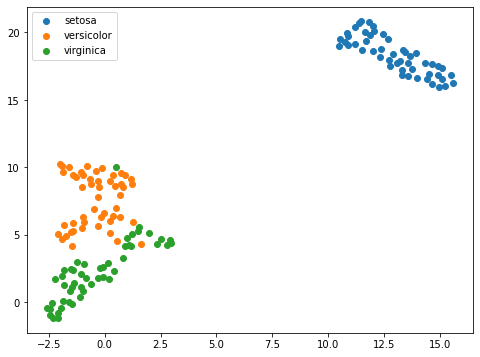

In [84]:
labels = range(len(iris.target_names))
plt.figure(figsize=(8,6))
colors = sns.color_palette(None, len(labels))
for i, c, label in zip(labels, colors, iris.target_names):
    plt.scatter(X_umap[Y == i, 0], X_umap[Y == i, 1], c=np.array([c]), label=label)
plt.legend()
plt.show()

## Técnicas de visualización con datos textuales

In [85]:
# Seleccionamos un texto cualquiera
text = '''Data science is the study of the extraction of knowledge from data.
It uses various techniques from many fields, including signal processing, mathematics, probability models, machine learning, computer programming, statistics, data engineering, pattern recognition and learning, visualization, uncertainty modeling, data warehousing, and high performance computing with the goal of extracting useful knowledge from the data.
Data Science is not restricted to only big data, although the fact that data is scaling up makes big data an important aspect of data science.
A practitioner of data science is called a data scientist. Data scientists solve complex data problems using various elements of mathematics, statistics and computer science, although expertise in these subjects are not required.
However, a data scientist is most likely to be an expert in only one or two of these disciplines, meaning that cross disciplinary teams can be a key component of data scienceGood data scientists are able to apply their skills to achieve a broad spectrum of end results.
The skill-sets and competencies that data scientists employ vary widely.'''

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions
from nltk.corpus import wordnet
from wordcloud import WordCloud

In [87]:
nltk.download('wordnet')
nltk.download('stopwords')

stopwords_cached = stopwords.words('english')
nltk.download('punkt')

wordnet_lemmatizer = WordNetLemmatizer()

only_characters = re.compile(r'[^\w]')
hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")
digits_re = re.compile(r'\b\d+\b')

def wordnet_value(value):
    result = ''
    # Filtramos las palabras y nos quedamos solo las que nos pueden interesar.
    # Estas son Adjetivos, Verbos, Sustantivos y Adverbios.
    if value.startswith('J'):
        return wordnet.ADJ
    elif value.startswith('V'):
        return wordnet.VERB
    elif value.startswith('N'):
        return wordnet.NOUN
    elif value.startswith('R'):
        return wordnet.ADV
    return result


def preprocess(text):
    text = text.lower()
    p_text = only_characters.sub(" ",text)
    p_text = hashtag_re.sub("",p_text)
    p_text = mention_re.sub("",p_text)
    p_text = url_re.sub("",p_text)
    p_text = digits_re.sub("",p_text)
    p_text = str.lower(p_text)
    p_text = contractions.fix(p_text)
    p_text = p_text.strip('"')
    p_text = p_text.strip("’")
    # Obtenemos los tokens de las sentencias.
    tokens = nltk.word_tokenize(p_text)
    # Generamos las etiquetas de las palabras.
    tokens = nltk.pos_tag(tokens)
    lemmatizeds = []

    for token in tokens:
        if len(token) > 0:
            pos = wordnet_value(token[1])
            # Filtramos las palabras que no nos interesan.
            if pos != '':
                lema = wordnet_lemmatizer.lemmatize(str(token[0]).lower(), pos=pos)
                if lema not in stopwords_cached and len(lema)>1:
                    lemmatizeds.append(lema)
    
    return lemmatizeds 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [88]:
tokens_lemmatized = preprocess(text)
tokens_lemmatized

['data',
 'science',
 'study',
 'extraction',
 'knowledge',
 'data',
 'use',
 'various',
 'technique',
 'many',
 'field',
 'include',
 'signal',
 'processing',
 'mathematics',
 'probability',
 'model',
 'machine',
 'learn',
 'computer',
 'program',
 'statistic',
 'data',
 'engineering',
 'pattern',
 'recognition',
 'learn',
 'visualization',
 'uncertainty',
 'model',
 'data',
 'warehousing',
 'high',
 'performance',
 'compute',
 'goal',
 'extract',
 'useful',
 'knowledge',
 'data',
 'data',
 'science',
 'restrict',
 'big',
 'data',
 'fact',
 'data',
 'scale',
 'make',
 'big',
 'data',
 'important',
 'aspect',
 'data',
 'science',
 'practitioner',
 'data',
 'science',
 'call',
 'data',
 'scientist',
 'data',
 'scientist',
 'solve',
 'complex',
 'data',
 'problem',
 'use',
 'various',
 'element',
 'mathematics',
 'statistic',
 'computer',
 'science',
 'expertise',
 'subject',
 'require',
 'however',
 'data',
 'scientist',
 'likely',
 'expert',
 'discipline',
 'mean',
 'cross',
 'discipli

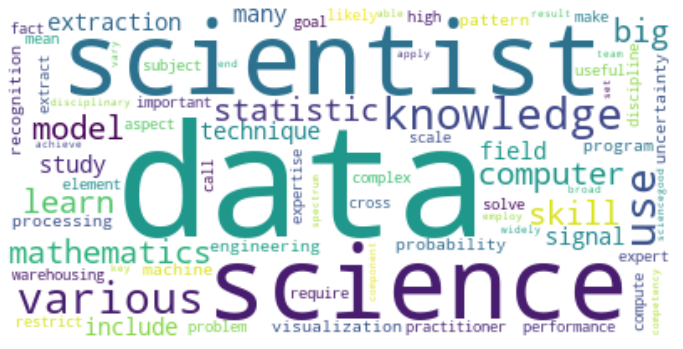

In [92]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(tokens_lemmatized))
#word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [93]:
text1 = '''Data science is the study of the extraction of knowledge from data.
It uses various techniques from many fields, including signal processing, mathematics, probability models, machine learning, computer programming, statistics, data engineering, pattern recognition and learning, visualization, uncertainty modeling, data warehousing, and high performance computing with the goal of extracting useful knowledge from the data.
Data Science is not restricted to only big data, although the fact that data is scaling up makes big data an important aspect of data science.
A practitioner of data science is called a data scientist.
Data scientists solve complex data problems using various elements of mathematics, statistics and computer science, although expertise in these subjects are not required. 
However, a data scientist is most likely to be an expert in only one or two of these disciplines, meaning that cross disciplinary teams can be a key component of data scienceGood data scientists are able to apply their skills to achieve a broad spectrum of end results. The skill-sets and competencies that data scientists employ vary widely.'''

text2 = '''Credit card firm Mastercard has confirmed it will accept selfie photos and fingerprints as an alternative to passwords when verifying IDs for online payments.
It follows a trial of the software carried out in the US and Netherlands last year.
The company told the BBC that 92% of its test subjects preferred the new system to passwords.
One expert said that such biometric checks had the potential to cut fraud.'''

text3 = '''Credit card firm Mastercard has confirmed it will accept selfie pictures and fingerprints as an alternative to passwords when verifying IDs for online payments.
It follows a trial of the software carried out in the US and Holland last year.
The company told the ABC that 92% of its test subjects preferred the new system to passwords.'''

text4 = '''Science is a systematic enterprise that builds and organizes knowledge in the form of testable explanations and predictions about the universe.
Contemporary science is typically subdivided into the natural sciences, which study the material universe; the social sciences, which study people and societies; and the formal sciences, which study logic and mathematics.
The formal sciences are often excluded as they do not depend on empirical observations. 
Disciplines which use science, like engineering and medicine, may also be considered to be applied sciences.
From classical antiquity through the 19th century, science as a type of knowledge was more closely linked to philosophy than it is now, and in the Western world the term "natural philosophy" once encompassed fields of study that are today associated with science, such as astronomy, medicine, and physics.
However, in the Middle East, during the Middle Ages foundations for the scientific method were laid by Ibn al-Haytham in his Book of Optics.
While the classification of the material world by the ancient Indians and Greeks into air, earth, fire and water was more philosophical, medieval Middle Easterns used practical and experimental observation to classify materials.'''

text5 = '''Data scientists are big data wranglers, gathering and analyzing large sets of structured and unstructured data.
A data scientist’s role combines computer science, statistics, and mathematics. 
They analyze, process, and model data then interpret the results to create actionable plans for companies and other organizations.
Data scientists are analytical experts who utilize their skills in both technology and social science to find trends and manage data.
They use industry knowledge, contextual understanding, skepticism of existing assumptions – to uncover solutions to business challenges.'''

In [94]:
tfidf = TfidfVectorizer()

def generate_tfidf(texts):
    tfidf_matrix = tfidf.fit_transform(texts)
    return tfidf_matrix

In [95]:
texts = [text1, text2, text3, text4, text5]
tfidf_matrix = generate_tfidf(texts)
similarity = cosine_similarity(tfidf_matrix)
similarity

array([[1.        , 0.1556321 , 0.14455222, 0.24173493, 0.58039947],
       [0.1556321 , 1.        , 0.83506354, 0.28343835, 0.11957401],
       [0.14455222, 0.83506354, 1.        , 0.27877582, 0.12099187],
       [0.24173493, 0.28343835, 0.27877582, 1.        , 0.2089656 ],
       [0.58039947, 0.11957401, 0.12099187, 0.2089656 , 1.        ]])

In [96]:
mds = MDS(random_state=0)
X_transform_texts = mds.fit_transform(similarity)
X_transform_texts

array([[ 0.68212219,  0.35810678],
       [-0.5417928 , -0.51526607],
       [-0.66275891, -0.37620893],
       [-0.2864211 ,  0.65149135],
       [ 0.80885062, -0.11812314]])

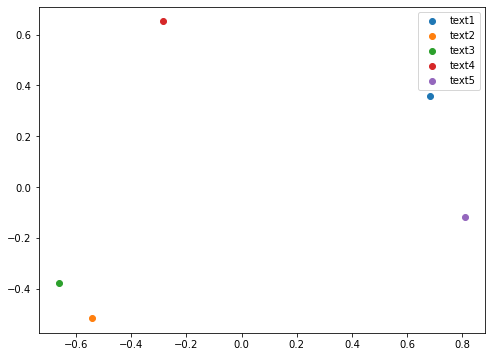

In [97]:
text_names = ['text1', 'text2', 'text3', 'text4', 'text5']
labels = range(len(text_names))
plt.figure(figsize=(8,6))
colors = sns.color_palette(None, len(labels))
for i, c, label in zip(labels, colors, text_names):
    plt.scatter(X_transform_texts[i, 0], X_transform_texts[i, 1], c=np.array([c]), label=label)
plt.legend()
plt.show()

## Ejercicios
Repetir todas técnicas de visualización clásicas y avanzadas con el dataset proporcionado a continuación.

Enlace de descarga del dataset: https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download